In [1]:
import IPython
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import io
%matplotlib inline

### load audio

In [2]:
url = "https://github.com/DiyeMark/audio_data/blob/194aac500c3e77b9662cbb6d3913db7132e09e2d/tr_10806_tr02129.wav?raw=true"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))

In [3]:
IPython.display.Audio(data=data, rate=rate)

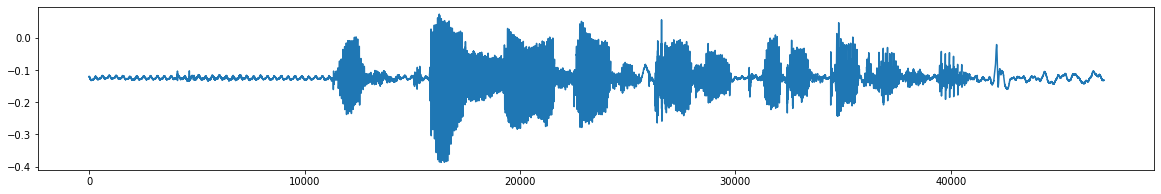

In [4]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

### add noise

In [5]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

In [6]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

### remove noise

In [7]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

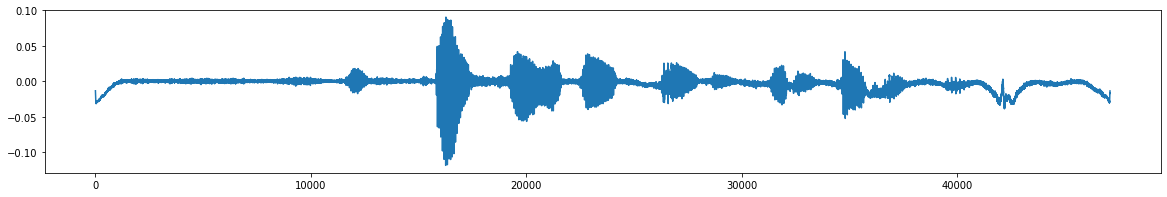

In [8]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [9]:
IPython.display.Audio(data=reduced_noise, rate=rate)